# Import Dependencies

In [23]:
# import the OpenCV library
import cv2
# Import Operating System
import os
# Import the matplotlib library
from matplotlib import pyplot as plt

# Setup Pre-trained Model

In [2]:
# load the pre-trained classifiers for face, smile, and eye detection
face_cascade = cv2.CascadeClassifier('face.xml')
smile_cascade = cv2.CascadeClassifier('smile.xml')
eye_cascade = cv2.CascadeClassifier('eye.xml')

# Define Function to Detect Features

In [19]:
def detect_features(frame):
    # convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale frame using the face cascade classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # for each detected face, draw a green rectangle around it and detect smiles and eyes within the face region
    for (x, y, w, h) in faces:
        # draw a green rectangle around the face on the original frame
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=5)
        # crop the face region from the original and gray scale frame
        face = frame[y : y+h, x : x+w]
        gray_face = gray[y : y+h, x : x+w]

        # detect smiles within the face region using the smile cascade classifier
        smiles = smile_cascade.detectMultiScale(gray_face, 2.5, minNeighbors=9)
         # for each detected smile, draw a red rectangle around it on the face region
        for (xp, yp, wp, hp) in smiles:
            # for each detected smile, draw a red rectangle around it on the face region
            face = cv2.rectangle(face, (xp, yp), (xp+wp, yp+hp),
                    color=(0, 0, 255), thickness=5)
        
        # detect eyes within the face region using the eye cascade classifier
        eyes = eye_cascade.detectMultiScale(gray_face, 2.5, minNeighbors=7)
        for (xp, yp, wp, hp) in eyes:
             # for each detected eye, draw a blue rectangle around it on the face region
            face = cv2.rectangle(face, (xp, yp), (xp+wp, yp+hp),
                    color=(255, 0, 0), thickness=5)
    # return the original frame with all detected features (faces, smiles, and eyes)
    return (frame)

# Detect From An Image

In [43]:
Image_path = os.path.join('\\Users\\intel\\Pictures\\Person.jpg')
frame = cv2.imread(Image_path)

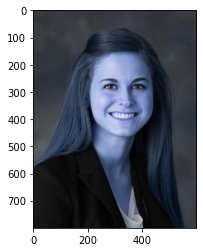

In [36]:
plt.imshow(frame)

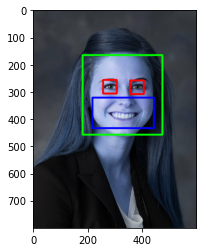

In [44]:
pic = detect_features(frame)
plt.imshow(pic)

# Real Time Detections from your Webcam

In [45]:
# open the video capture device (webcam)
cap = cv2.VideoCapture(0)
while cap.isOpened:
    # read a frame from the video capture device
    ret,frame = cap.read()

    # detect features in the frame using the detect_features function
    frame = detect_features(frame)
    cv2.imshow('webcame', frame)
    
    # wait for the user to press 'q' to exit the program
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# release the video capture device and close all windows
cap.release()
cv2.destroyAllWindows()